<a href="https://colab.research.google.com/github/ABHI2410/CSE5367-PR/blob/main/patternRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
def extract_features(images):
    features = []
    for image in images:
        pixel_features = np.float32(image.reshape(-1, 3))
        print(pixel_features)
        features.append(pixel_features)
    return features

# Extract features


        # Extract SIFT features
        # sift = cv2.SIFT_create()
        # sift_features = sift.detectAndCompute(image, None)[1]
        # features.append(sift_features)

        # Extract HOG features
        # hog = cv2.HOGDescriptor()
        # hog_features = hog.compute(image)
        # features.append(hog_features)

        # Extract DEEP features
        # deep_features = get_deep_features(image)
        # features.append(deep_features)

In [11]:

# Load the dataset
image_dir = 'VOCdevkit/VOC2012/JPEGImages/'
images = []
for filename in os.listdir(image_dir)[:1]:
    image = cv2.imread(os.path.join(image_dir, filename))
    img_convert = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(np.array(img_convert))

features = extract_features(images)



[[113. 138. 117.]
 [135. 166. 148.]
 [152. 186. 172.]
 ...
 [ 68.  95.  40.]
 [ 92. 108.  59.]
 [ 63.  96.  39.]]


In [24]:
# Apply K-means clustering
K =2
attempts = 10
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=attempts, max_iter=300, random_state=0)
kmeans.fit(features[0])
center = kmeans.cluster_centers_
center = np.uint8(center)

labels = kmeans.predict(features[0])
res = center[labels.flatten()]
result_image1 = res.reshape(img_convert.shape)

K =3
attempts = 10
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=attempts, max_iter=300, random_state=0)
kmeans.fit(features[0])
center = kmeans.cluster_centers_
center = np.uint8(center)

labels = kmeans.predict(features[0])
res = center[labels.flatten()]
result_image2 = res.reshape(img_convert.shape)

K =4
attempts = 10
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=attempts, max_iter=300, random_state=0)
kmeans.fit(features[0])
center = kmeans.cluster_centers_
center = np.uint8(center)

labels = kmeans.predict(features[0])
res = center[labels.flatten()]
result_image3 = res.reshape(img_convert.shape)

K =5
attempts = 10
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=attempts, max_iter=300, random_state=0)
kmeans.fit(features[0])
center = kmeans.cluster_centers_
center = np.uint8(center)

labels = kmeans.predict(features[0])
res = center[labels.flatten()]
result_image4 = res.reshape(img_convert.shape)

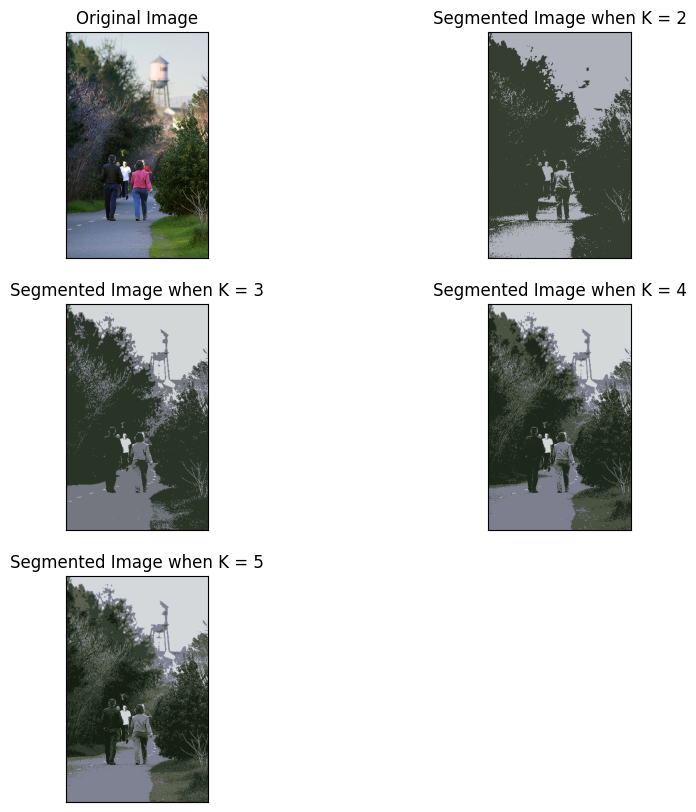

In [26]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
#original image
plt.subplot(3,2,1),plt.imshow(img_convert)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#image 2
plt.subplot(3,2,2),plt.imshow(result_image1)
plt.title('Segmented Image when K = 2'), plt.xticks([]), plt.yticks([])
#image 3
plt.subplot(3,2,3),plt.imshow(result_image2)
plt.title('Segmented Image when K = 3'), plt.xticks([]), plt.yticks([])
#image 4
plt.subplot(3,2,4),plt.imshow(result_image3)
plt.title('Segmented Image when K = 4'), plt.xticks([]), plt.yticks([])
#image 5
plt.subplot(3,2,5),plt.imshow(result_image4)
plt.title('Segmented Image when K = 5'), plt.xticks([]), plt.yticks([])

plt.show()

[2347745280.0, 621576064.0, 265291744.0, 172707616.0, 141904960.0, 119055232.0, 105252968.0, 94588784.0, 86155056.0, 76168304.0, 70294608.0, 64936772.0, 61749920.0, 56903268.0, 54316072.0, 51390644.0, 49639344.0, 47523688.0, 45486460.0]


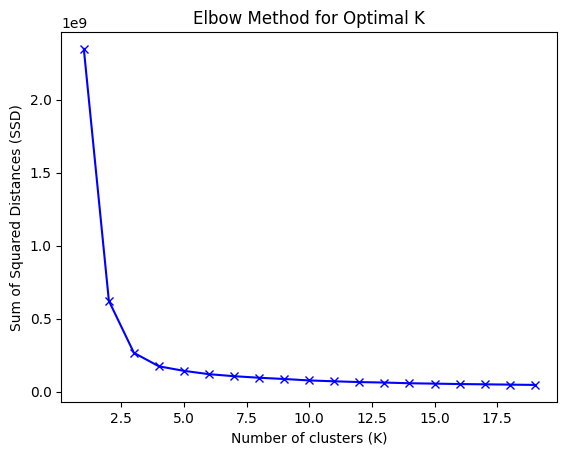

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSD = []
K_range = range(1, 20)  # Assuming you want to try K from 1 to 10

attempts = 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=300, random_state=0)
    kmeans.fit(features[0])
    SSD.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

print(SSD)
plt.plot(K_range, SSD, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal K')
plt.show()
